In [17]:
import numpy as np
import pandas as pd
import json
import pandasql as psql
import eng_to_ipa as ipa
import matplotlib.pyplot as plt

## Loading Datasets

In [43]:
movies_df = pd.read_csv('MovieSummaries/movie.metadata.tsv',sep='\t',names=['Wikipedia_ID','Freebase_ID','Name','Release_date','Box_office_revenues','Runtime','Languages','Country','Genres'])
movies_df.head()

,Wikipedia_ID,Freebase_ID,Name,Release_date,Box_office_revenues,Runtime,Languages,Country,Genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"


In [44]:
character_df = pd.read_csv('MovieSummaries/character.metadata.tsv',sep='\t', names=['Wikipedia_ID','Freebase_ID','Release_date','Character_name','Actor_DOB',
                                                                                    'Sex','Height','Ethnicity','Actor_name','Actor_age','Freebase_character_map'
                                                                                    ,'?','??'])
character_df.head()

,Wikipedia_ID,Freebase_ID,Release_date,Character_name,Actor_DOB,Sex,Height,Ethnicity,Actor_name,Actor_age,Freebase_character_map,?,??
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg


In [45]:
# Cleaning Languages, Country and Genres Columns

def str_dict_to_values(dict_in_str: str)->list[str]:
    
    if dict_in_str is None:  
        return []
    dict_ = json.loads(dict_in_str)
    values = list(dict_.values())
    return values

movies_df['Languages'] = movies_df['Languages'].apply(str_dict_to_values)
movies_df['Country'] =movies_df['Country'].apply(str_dict_to_values)
movies_df['Genres'] =movies_df['Genres'].apply(str_dict_to_values)



In [41]:
# Merging the 2 datasets and keeping only interesting features

phonetic_df = pd.merge(movies_df,character_df, on="Wikipedia_ID",how="inner")[['Wikipedia_ID','Name','Languages','Country','Genres','Character_name']]

phonetic_df.tail()

,Wikipedia_ID,Name,Languages,Country,Genres,Character_name
450664,12476867,Spliced,[English Language],[Canada],"[Thriller, Horror, Slasher, Teen]",NaN
450665,12476867,Spliced,[English Language],[Canada],"[Thriller, Horror, Slasher, Teen]",NaN
450666,12476867,Spliced,[English Language],[Canada],"[Thriller, Horror, Slasher, Teen]",NaN
450667,12476867,Spliced,[English Language],[Canada],"[Thriller, Horror, Slasher, Teen]",NaN
450668,12476867,Spliced,[English Language],[Canada],"[Thriller, Horror, Slasher, Teen]",NaN


## Handling NaN values

In [46]:
def percentage_nan(df:pd.DataFrame,column:str)->int :
    count = df[column].isna().sum()
    return count/ len(phonetic_df['Character_name']) *100

print(percentage_nan(phonetic_df,'Character_name'))


57.22048776374679


In [47]:
#Removing NaN rows from Character column

def remove_nan_rows(df:pd.DataFrame,column:str)->None:
    ind = df[df[column].isna()==True].index
    df.drop(ind, inplace=True)

remove_nan_rows(phonetic_df,'Character_name')

phonetic_df.tail()

,Wikipedia_ID,Name,Languages,Country,Genres,Character_name
450656,913762,The Super Dimension Fortress Macross II: Lover...,[Japanese Language],[Japan],"[Science Fiction, Japanese Movies, Adventure, ...",UN Spacy Commander
450657,913762,The Super Dimension Fortress Macross II: Lover...,[Japanese Language],[Japan],"[Science Fiction, Japanese Movies, Adventure, ...",Silvie Gena
450658,913762,The Super Dimension Fortress Macross II: Lover...,[Japanese Language],[Japan],"[Science Fiction, Japanese Movies, Adventure, ...",Exegran
450659,913762,The Super Dimension Fortress Macross II: Lover...,[Japanese Language],[Japan],"[Science Fiction, Japanese Movies, Adventure, ...",Elensh
450660,913762,The Super Dimension Fortress Macross II: Lover...,[Japanese Language],[Japan],"[Science Fiction, Japanese Movies, Adventure, ...",Hibiki


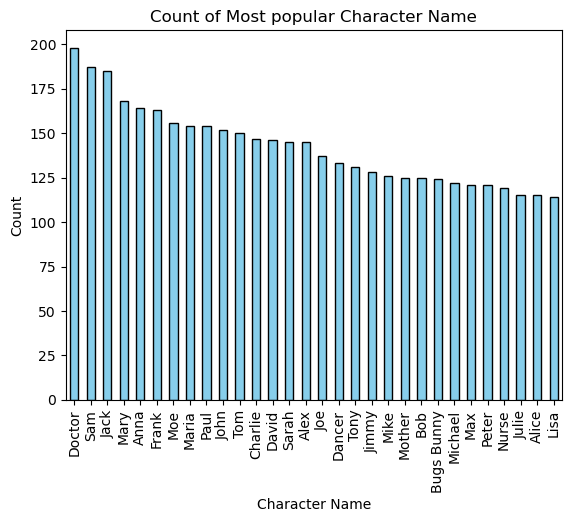

In [48]:
name_counts = phonetic_df['Character_name'].value_counts()

top_names_bar = name_counts.head(30)

top_names_bar.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Character Name')
plt.ylabel('Count')
plt.title('Count of Most popular Character Name')
plt.show()

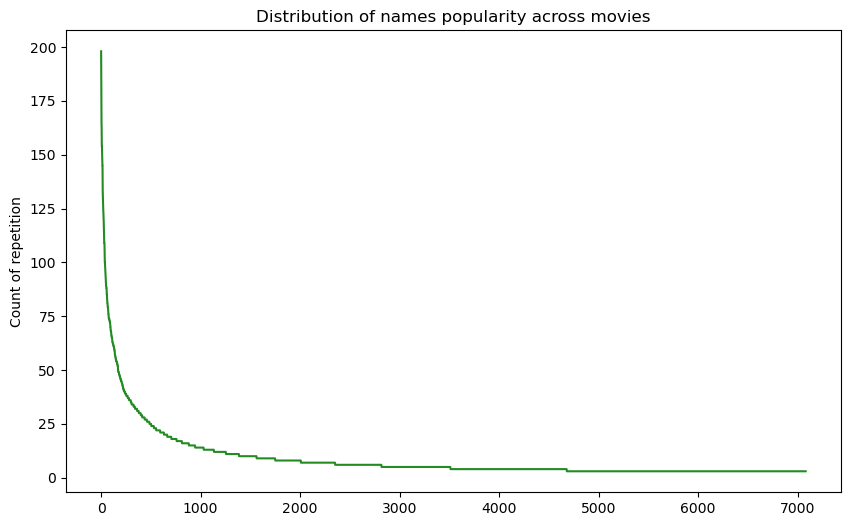

In [36]:
repeated_names = name_counts[name_counts>=3]
plt.figure(figsize=(10, 6))
plt.plot(repeated_names.values, color='forestgreen', linestyle='-', markersize=5)
plt.ylabel("Count of repetition")
plt.title("Distribution of names popularity across movies")
plt.show()

In [51]:
#Converting character's names to their phonetic equivalent

unique_strings = phonetic_df['Character_name'].unique()

# We map every unique string to their phonetic equivalent
phonetic_map = {word: ipa.convert(word) for word in unique_strings}


phonetic_df['Phonetic'] = phonetic_df['Character_name'].map(phonetic_map)


KeyboardInterrupt: 